In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [2]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = "../MangoLeafBD Dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


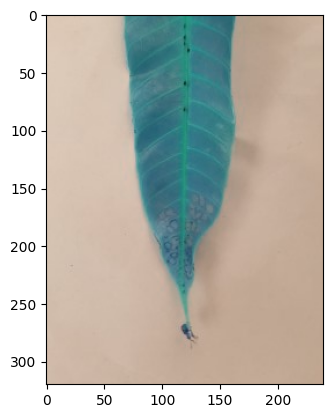

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [5]:
print(len(training_data))

4000


In [6]:
lenofimage = len(training_data)

In [7]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [8]:
X.shape

(4000, 30000)

**flattening the array**

In [9]:
X[1]

array([229, 214, 205, ..., 192, 167, 147], dtype=uint8)

max-scaling


In [10]:
X = X / 255.0

Ex. of flattened array...

In [11]:
X[1]

array([0.89803922, 0.83921569, 0.80392157, ..., 0.75294118, 0.65490196,
       0.57647059])

note : y should be in array form compulsory.


In [12]:
y = np.array(y)

In [13]:
y.shape

(4000,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [15]:
svc = SVC(kernel="linear", gamma="auto")
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

**predicting the X_test**

In [16]:
y_pred = svc.predict(X_test)

Evaluation 

In [17]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.77875


In [18]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.98      0.91      0.94        99
           1       0.74      0.87      0.80        97
           2       0.98      0.93      0.95       112
           3       0.88      0.94      0.91        88
           4       0.42      0.56      0.48        85
           5       0.85      0.85      0.85       105
           6       0.81      0.71      0.76       105
           7       0.62      0.46      0.53       109

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.79      0.78      0.78       800



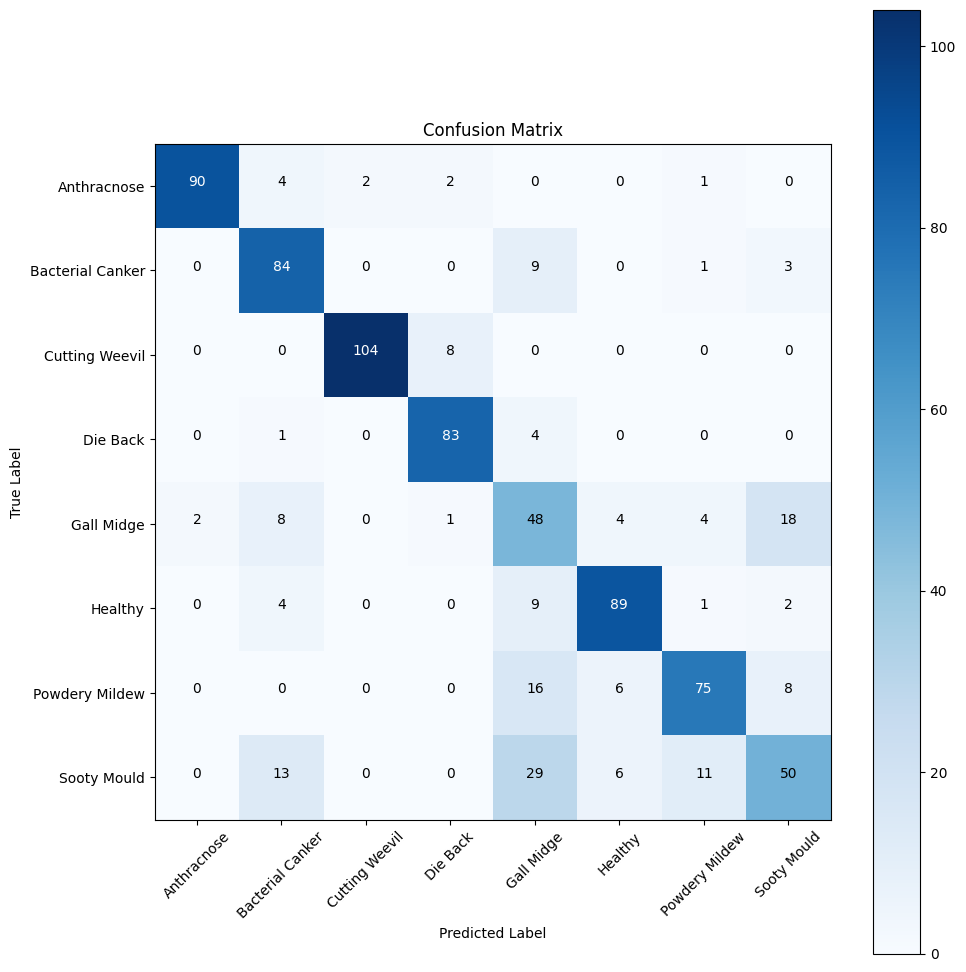

In [19]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [15]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/features.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)
# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
print(X.head())
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

      area   perimeter  physiological_length  physiological_width  \
0  17236.5  751.546244                   259                  112   
1  16122.5  751.889390                   258                  101   
2  19900.5  905.997035                   320                  117   
3  23603.5  926.222429                   320                  115   
4  21477.0  798.901583                   320                   96   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  \
0      2.312500        0.594198     0.383484         112         259   
1      2.554455        0.618716     0.358372         101         258   
2      2.735043        0.531530     0.304663         117         320   
3      2.782609        0.641399     0.345745         115         320   
4      3.333333        0.699121     0.422860          96         320   

   convex_area  ...      mean_r      mean_g      mean_b   stddev_r   stddev_g  \
0      19932.5  ...  169.252227  166.094727  154.148958  59.423466  26.

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [17]:
svc = SVC(kernel="linear", gamma="auto")
svc.fit(X_train, y_train)

**predicting the X_test**

In [ ]:
y_pred = svc.predict(X_test)

Evaluation 

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

In [ ]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using grid search


In [ ]:
from sklearn import svm
from sklearn.model_selection import (
    GridSearchCV,
)  # Defining the parameters grid for GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.0001, 0.001, 0.1, 1],
    "kernel": ["rbf", "poly"],
}

# Creating a support vector classifier
svc = svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
svc = GridSearchCV(svc, param_grid)

In [ ]:
svc.fit(X_train, y_train)

**predicting the X_test**

In [ ]:
y_pred = svc.predict(X_test)

Evaluation 

In [ ]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

In [ ]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

In [ ]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()